MAD Graphs for Patient 9

In [1]:
# Import Modules
import sys
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat

from Modules import Actigraph_Metrics

In [14]:
# signal parameters
freq = 100 #signal is 100hz

5 Min Double-Sided Window

In [33]:
# TODO: CHANGE THESE PARAMS
# Set params
data_dir = './PatientData/Patient9'
filename = 'Patient9_5MIN_DSW_AllSBS.mat'

window_size = 3000 #100 is 1 second worth of time

# Run all the cells below

In [34]:
# Load 5 Min 1-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
SBS = data["sbs"]

print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
59899


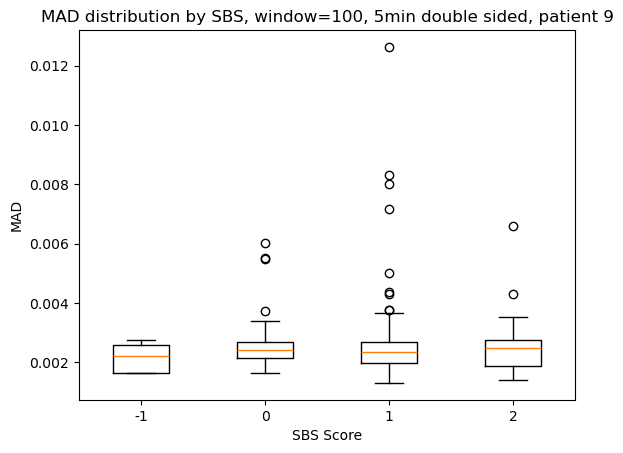

In [36]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):    
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
    sbs_mad_dict[sbs_value].extend(signal)

# # Box plot: OUTLIERS ARE OMITTED to zoom in on the distribution
# plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=False)

# Box plot: this version will show the outliers too
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=True)
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('MAD distribution by SBS, window=100, 5min double sided, patient 9')
plt.show()     

In [37]:
# print quartiles and 90th percentile
quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

SBS Score: -1
Q1: 0.0016331627780923341
Q2 (Median): 0.0022309406203770976
Q3: 0.002589935109789193
90th Percentile: 0.0027301829662133015

SBS Score: 0
Q1: 0.0021321370897388614
Q2 (Median): 0.0024303241199956638
Q3: 0.0026940964270052437
90th Percentile: 0.0028751051341878945

SBS Score: 1
Q1: 0.0019937614992459607
Q2 (Median): 0.0023507338731488803
Q3: 0.0026706127512075573
90th Percentile: 0.0029699768281981954

SBS Score: 2
Q1: 0.0018900036548808452
Q2 (Median): 0.0024921516992608694
Q3: 0.0027384928239257977
90th Percentile: 0.0027891638506060577



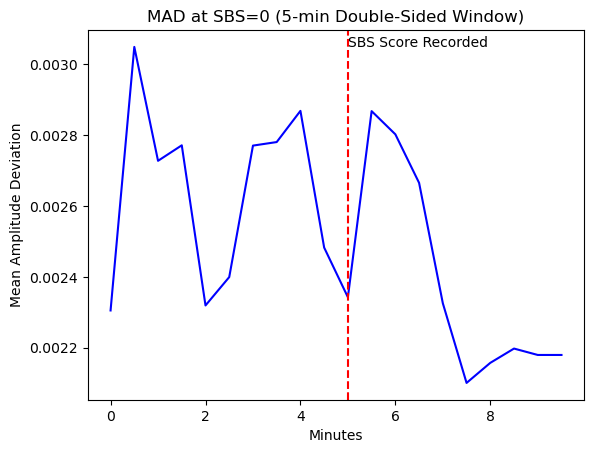

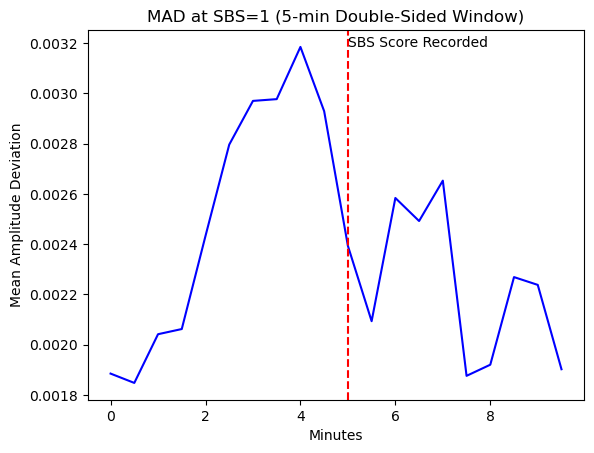

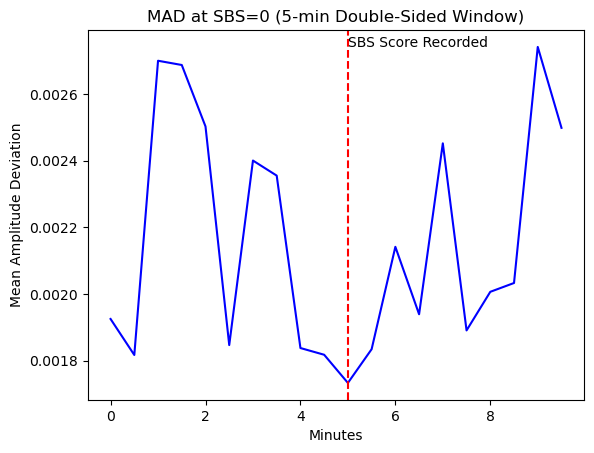

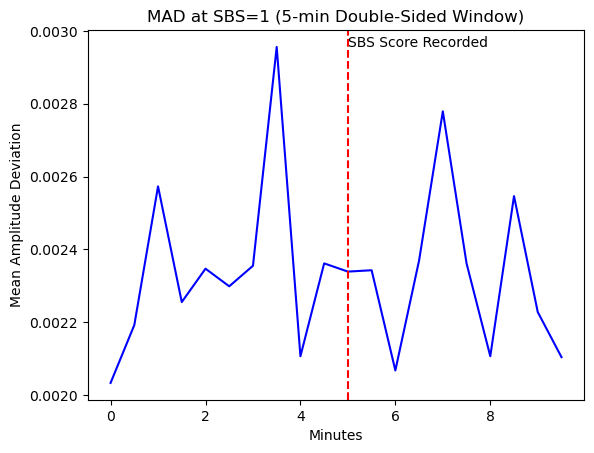

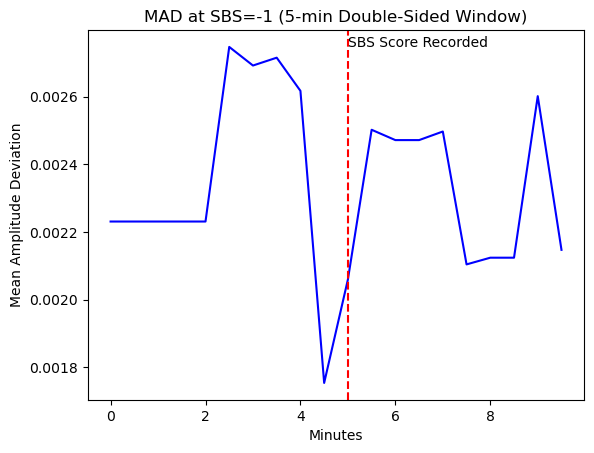

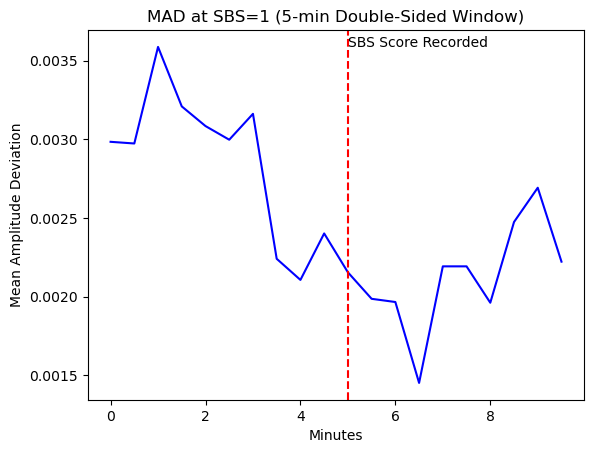

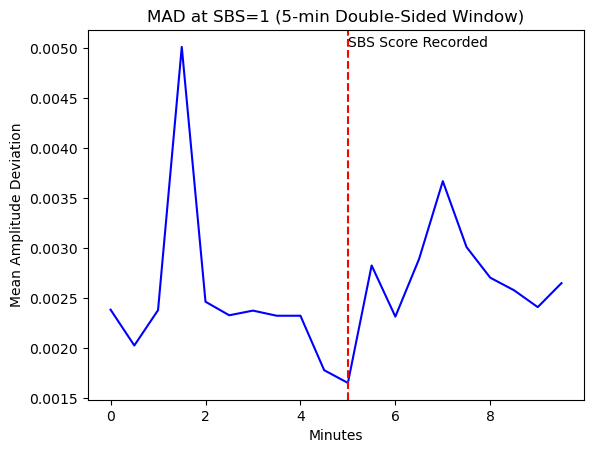

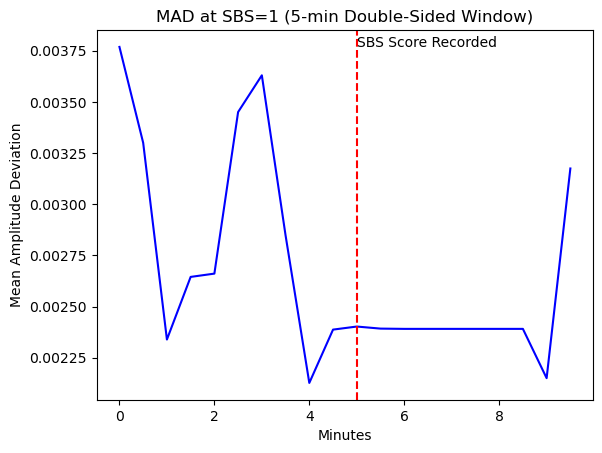

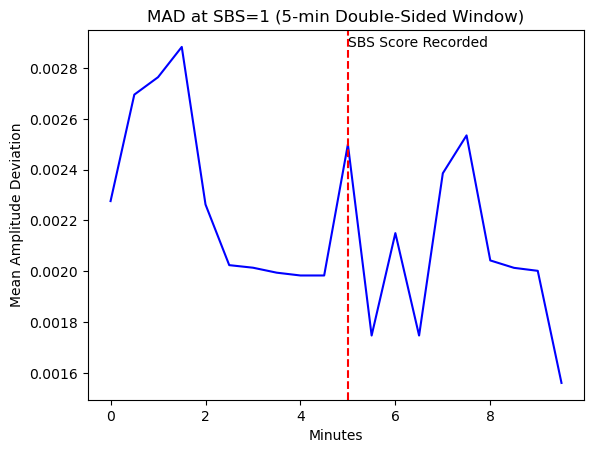

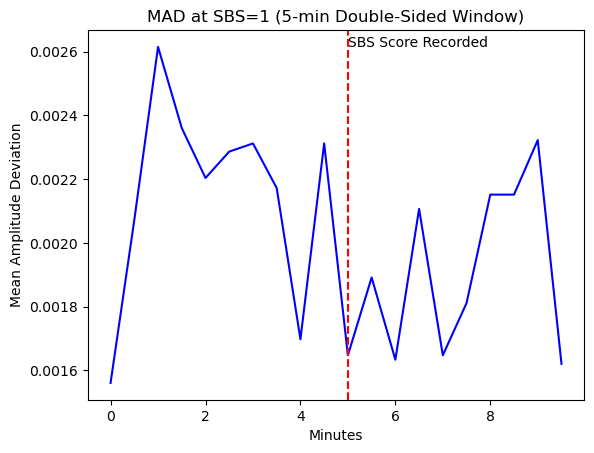

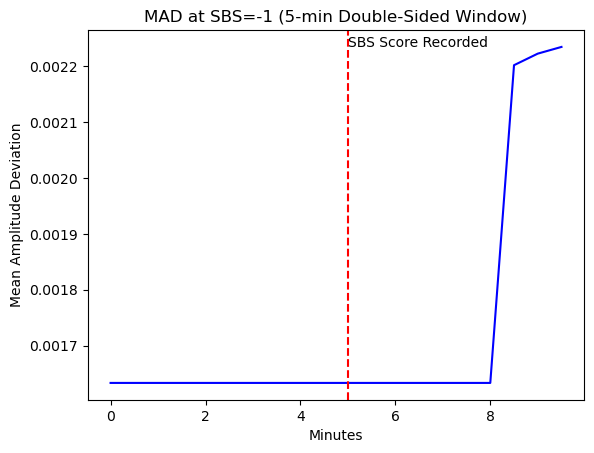

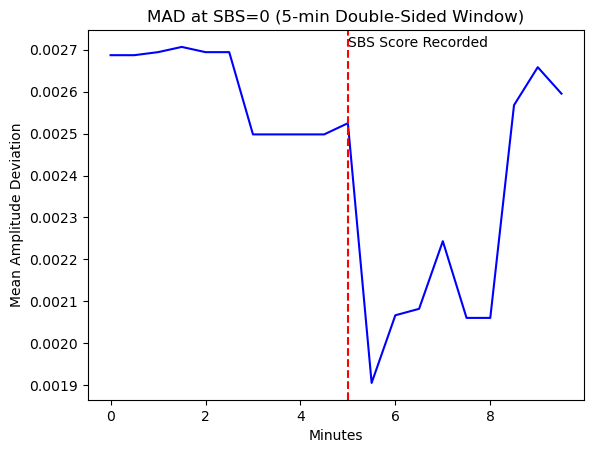

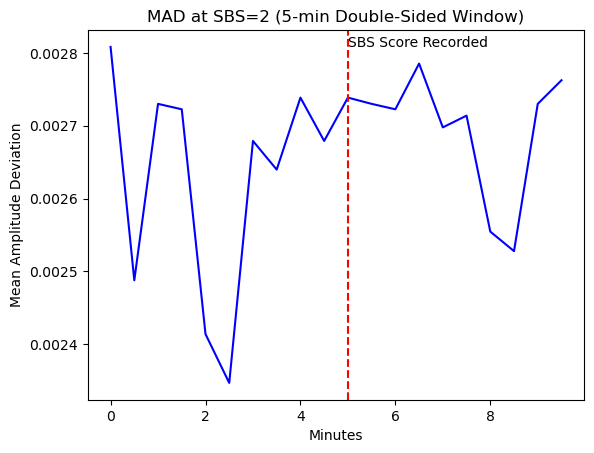

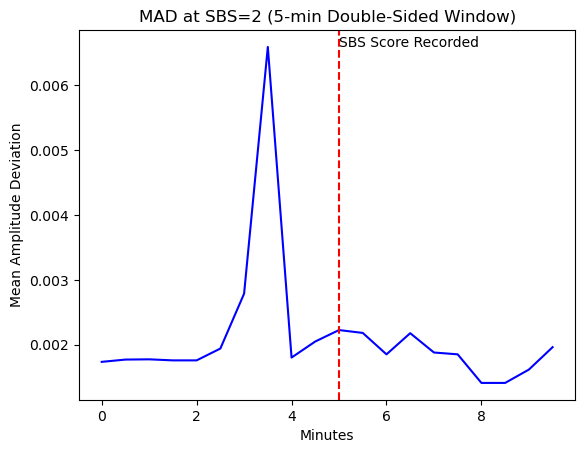

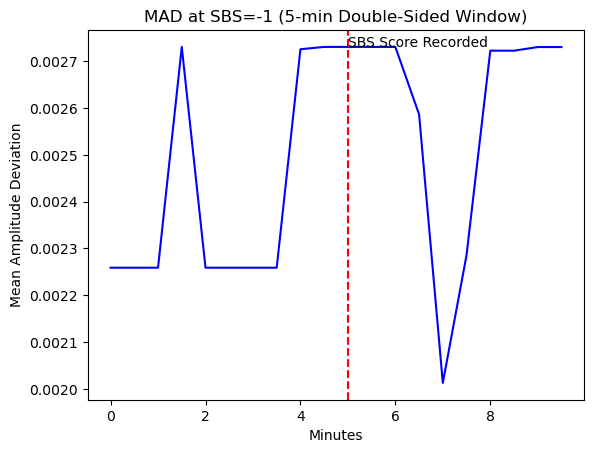

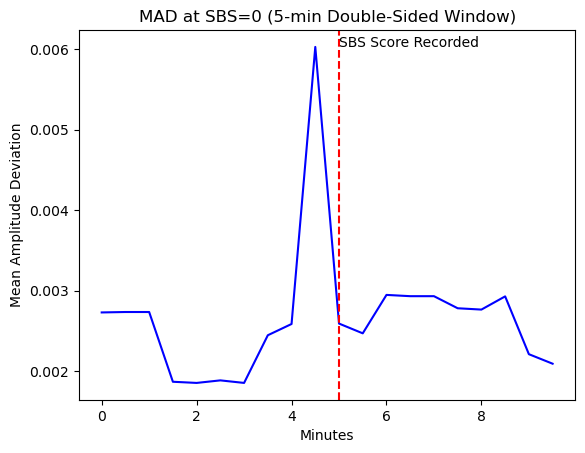

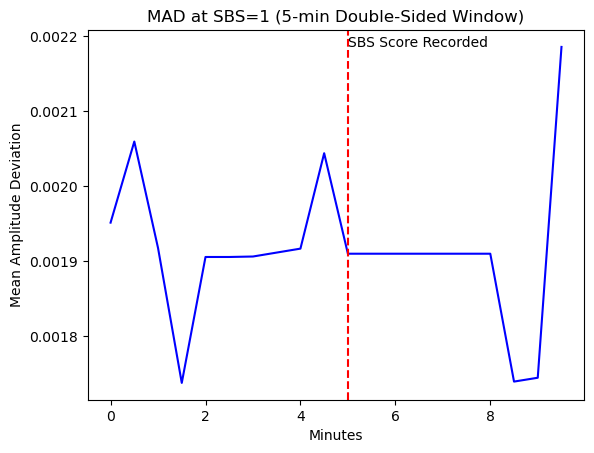

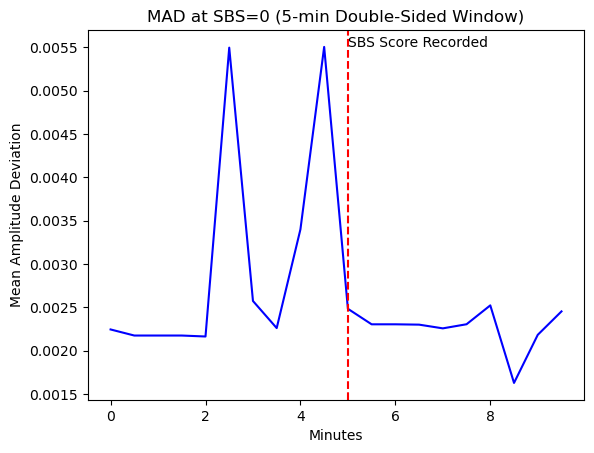

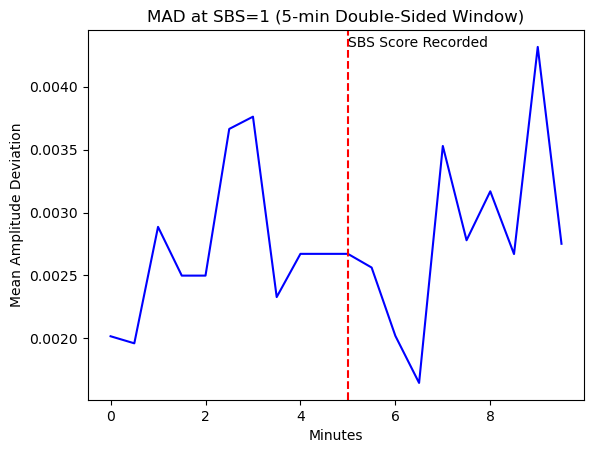

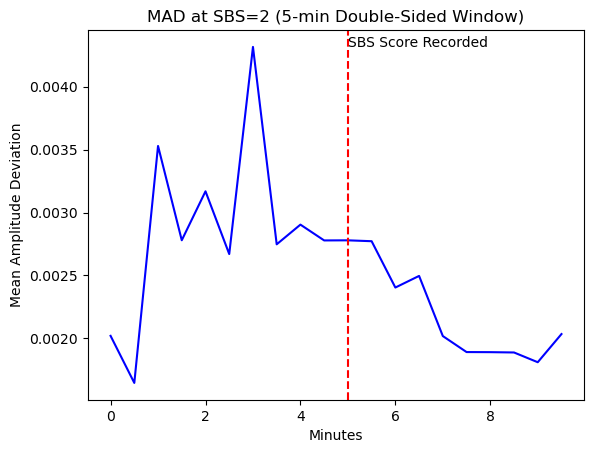

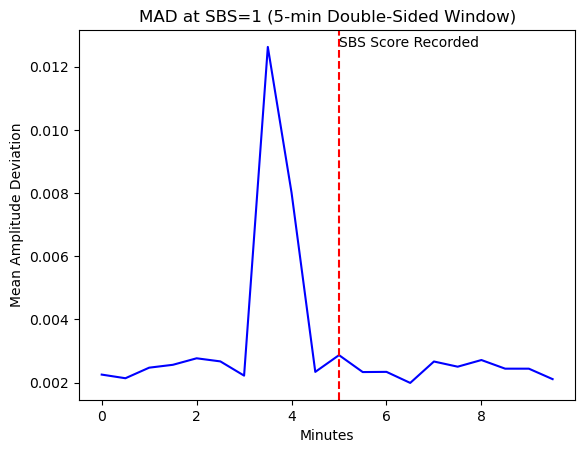

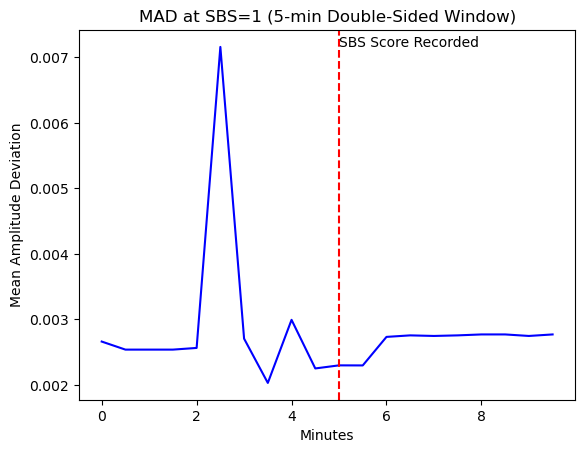

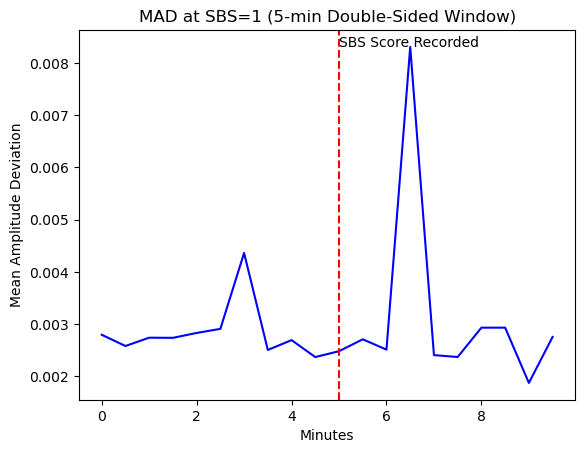

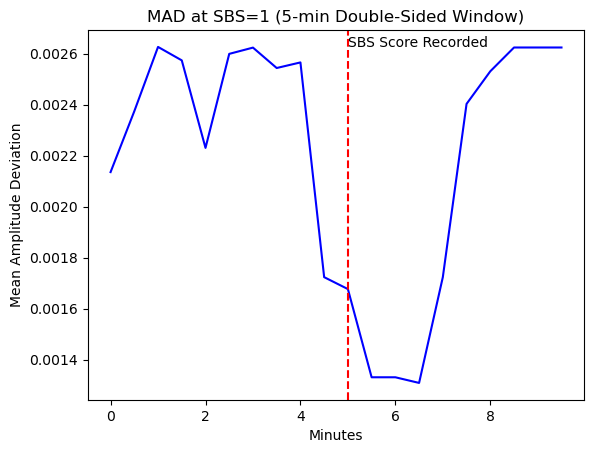

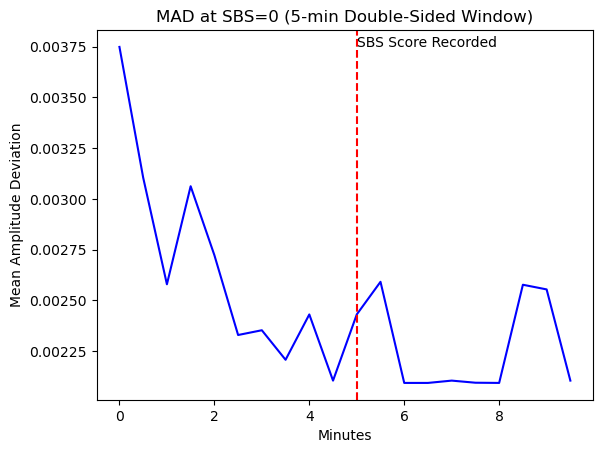

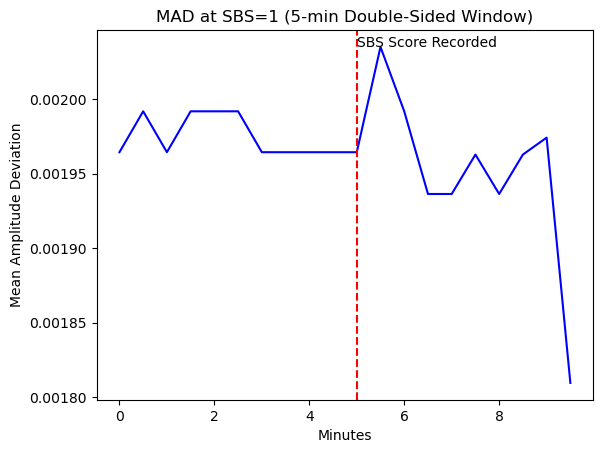

In [70]:
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(SBS[0]):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline(t[len(t)//2], color='red', linestyle='--')
    plt.text(t[len(t)//2], max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (5-min Double-Sided Window)')
    plt.show()

    # save plots
    folder_path = './AnalysisResults/Patient9_5MIN_DSW'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1

10 Minute - 5 Minute Double-Sided Window

In [14]:
# Load 10-Min, 5-MIN Double-Sided Window Data
data_dir = './PatientData/Patient9'
filename = 'Patient9_10MIN_5MIN_DSW_AllSBS.mat'

data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
SBS = data["sbs"]

print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
89899


In [15]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

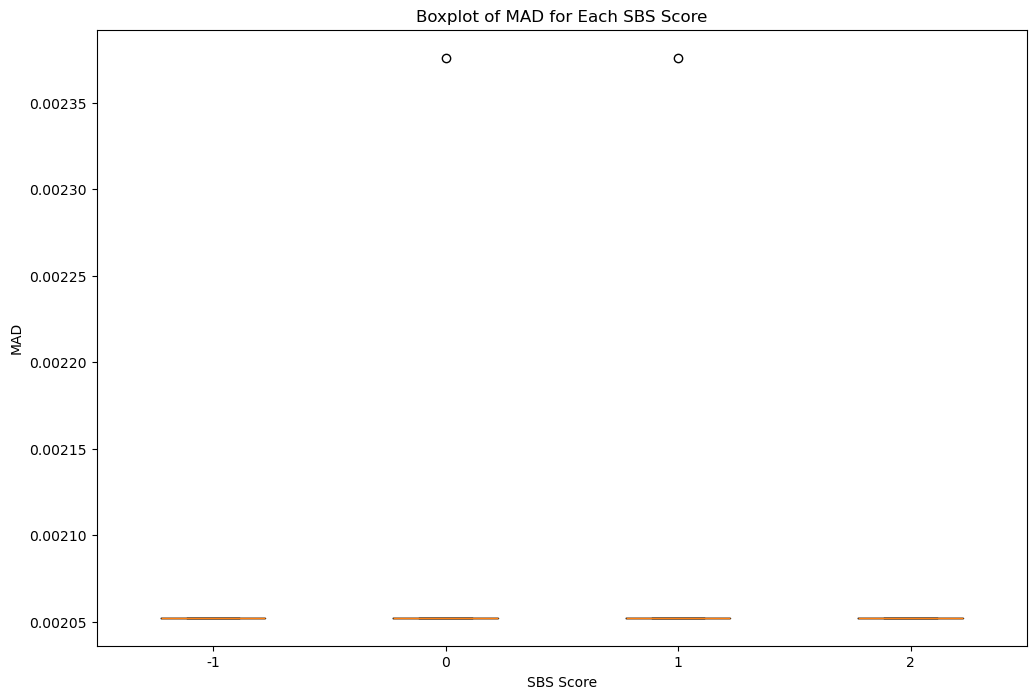

SBS Score: -1
Q1: 0.0020523553979783227
Q2 (Median): 0.0020523553979783227
Q3: 0.0020523553979783227
90th Percentile: 0.0020523553979783227

SBS Score: 0
Q1: 0.0020523553979783227
Q2 (Median): 0.0020523553979783227
Q3: 0.0020523553979783227
90th Percentile: 0.002214148905651414

SBS Score: 1
Q1: 0.0020523553979783227
Q2 (Median): 0.0020523553979783227
Q3: 0.0020523553979783227
90th Percentile: 0.0020523553979783227

SBS Score: 2
Q1: 0.0020523553979783227
Q2 (Median): 0.0020523553979783227
Q3: 0.0020523553979783227
90th Percentile: 0.0020523553979783227



In [16]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

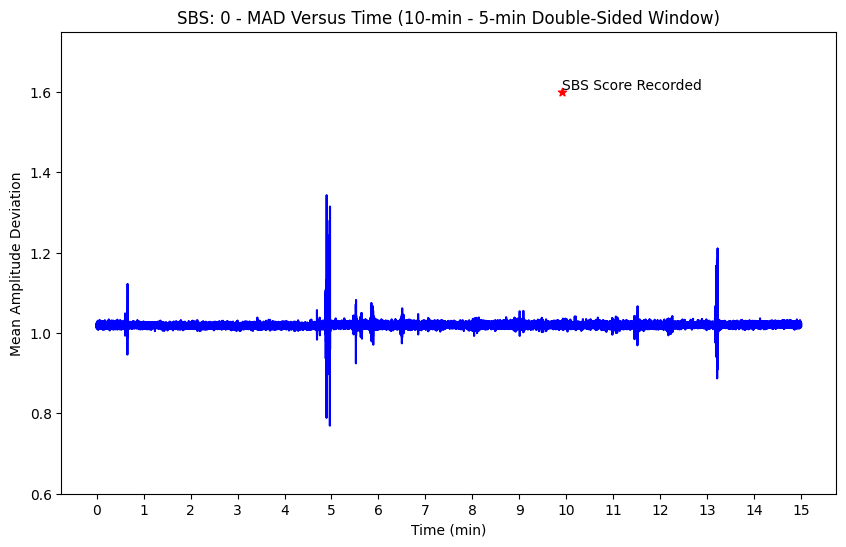

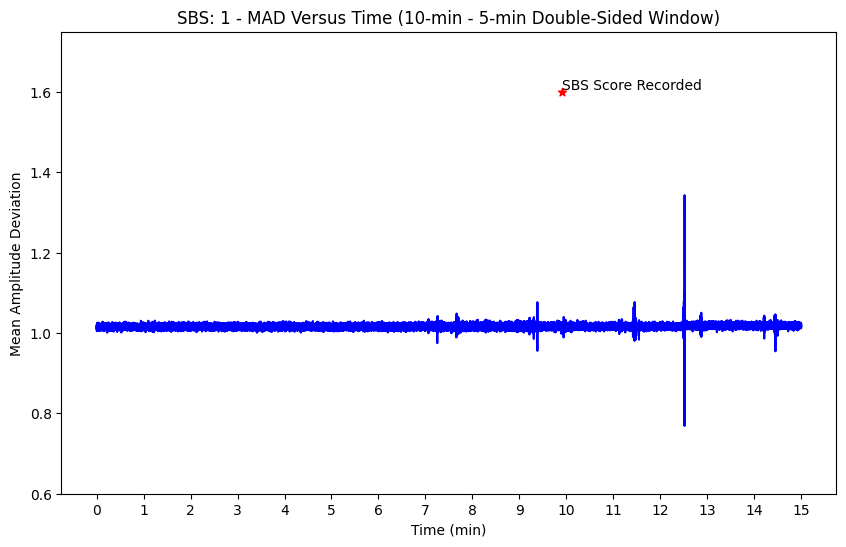

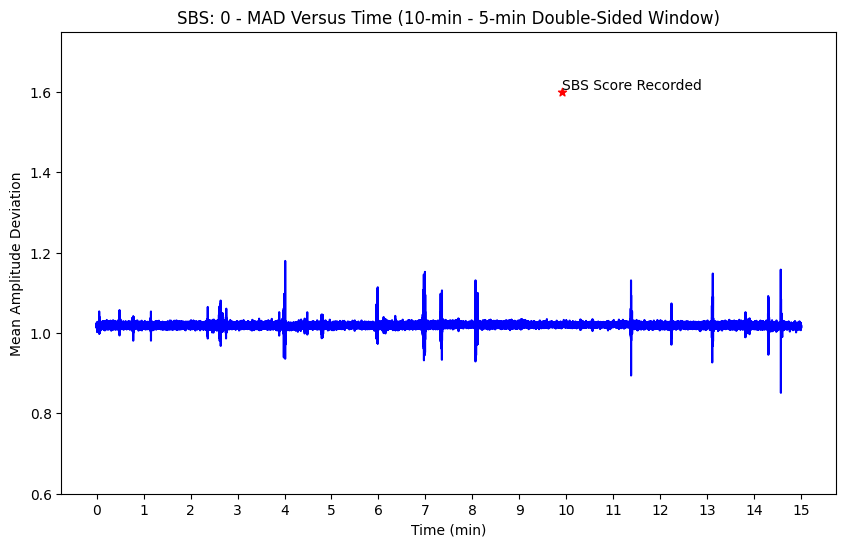

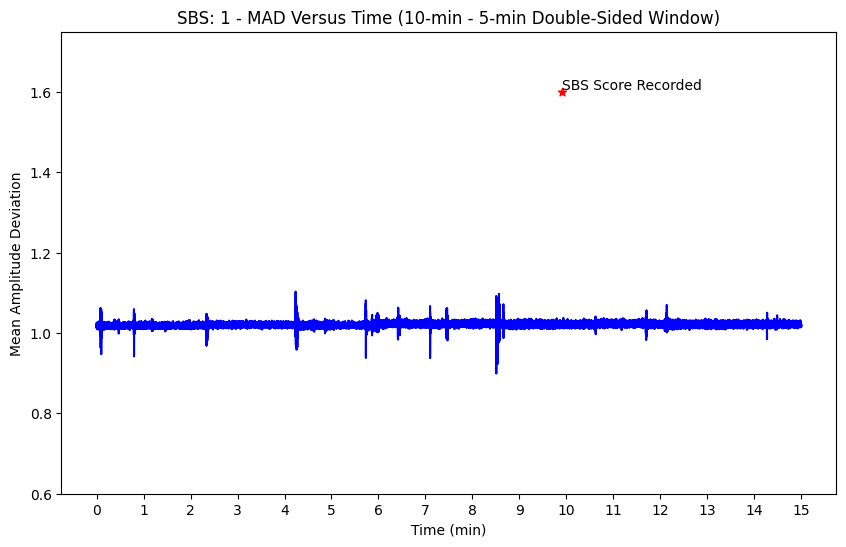

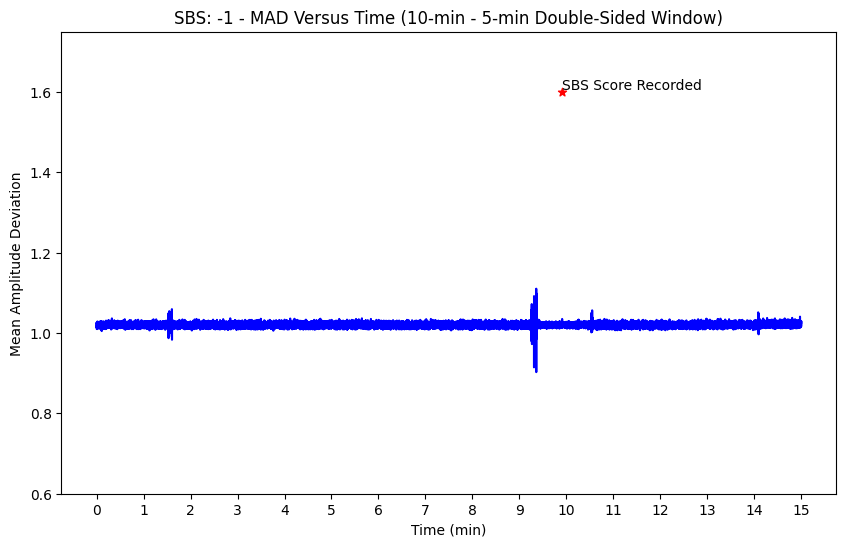

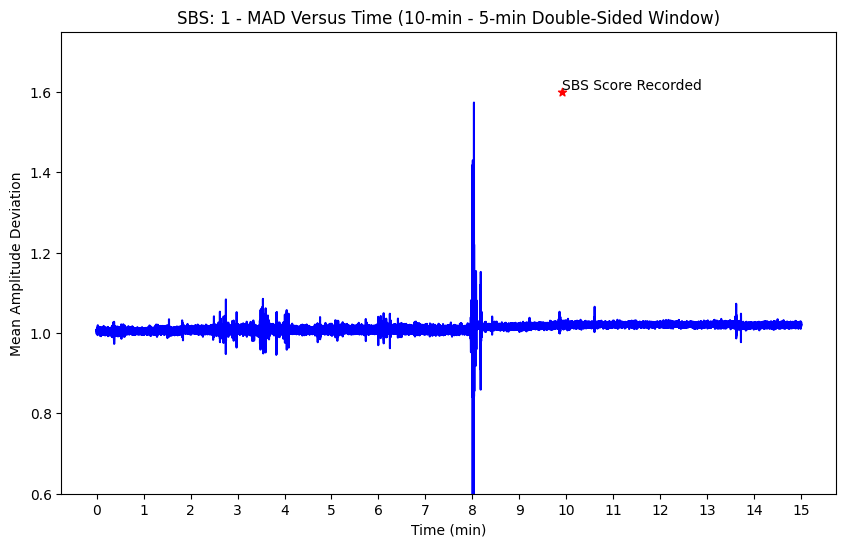

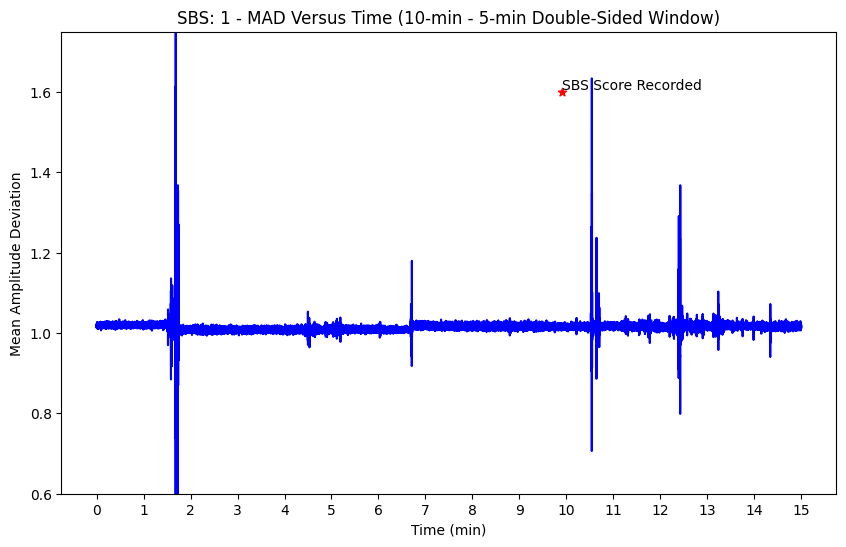

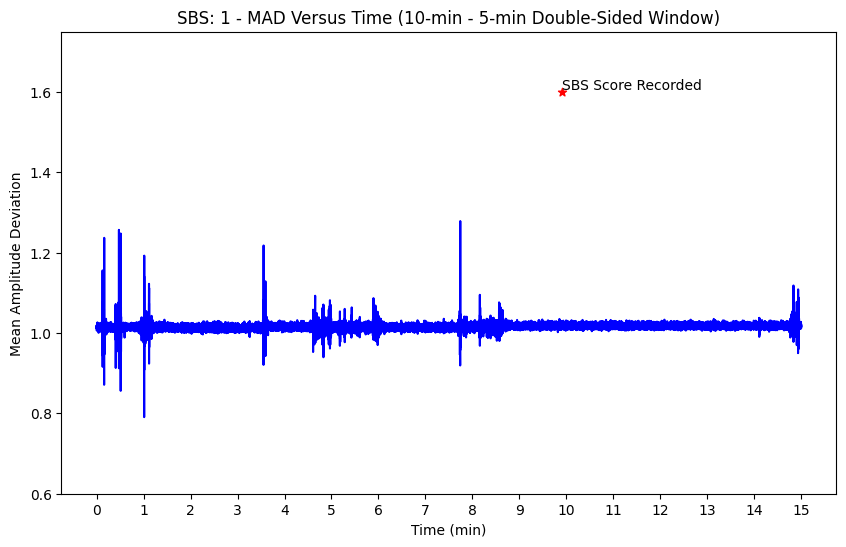

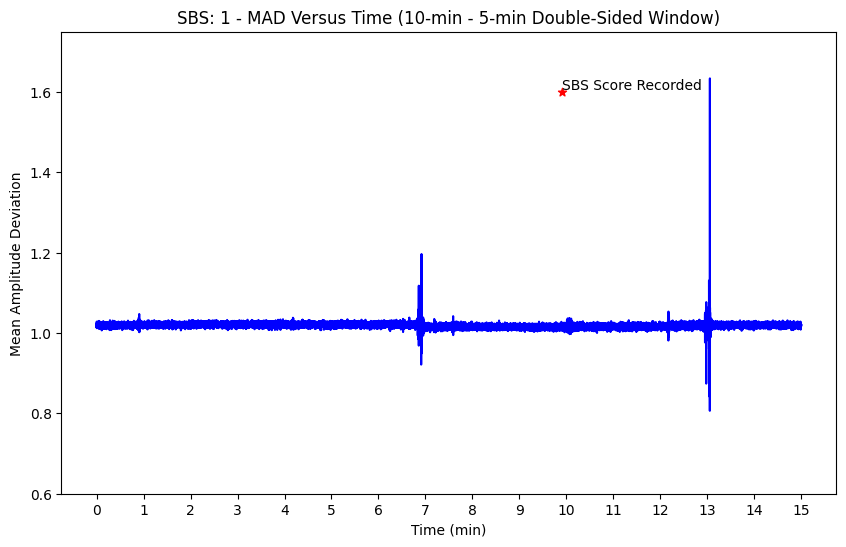

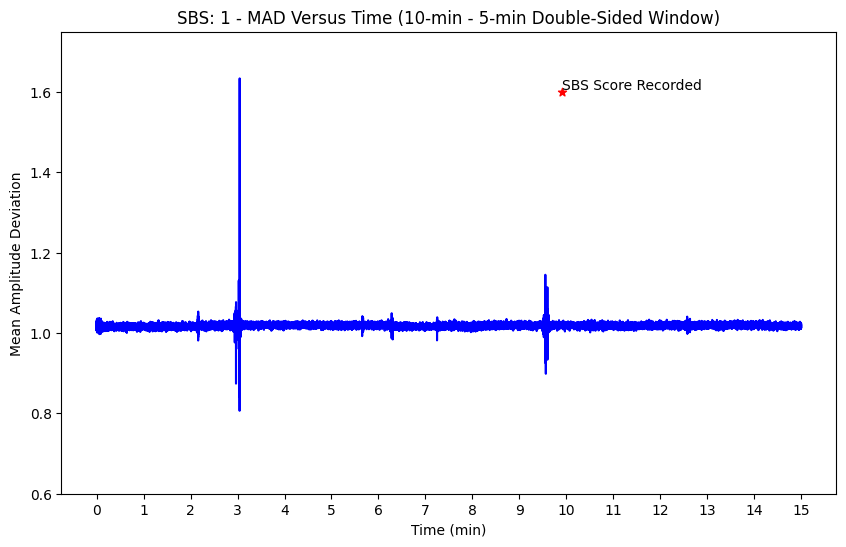

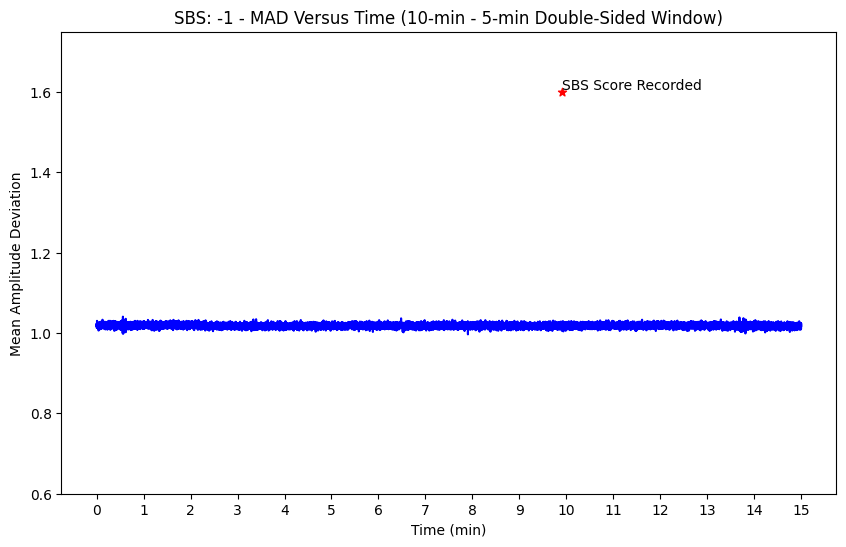

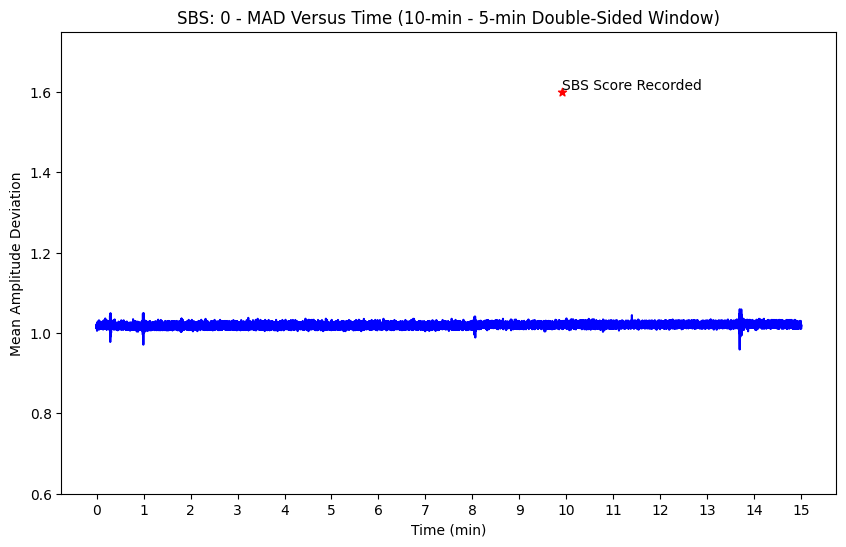

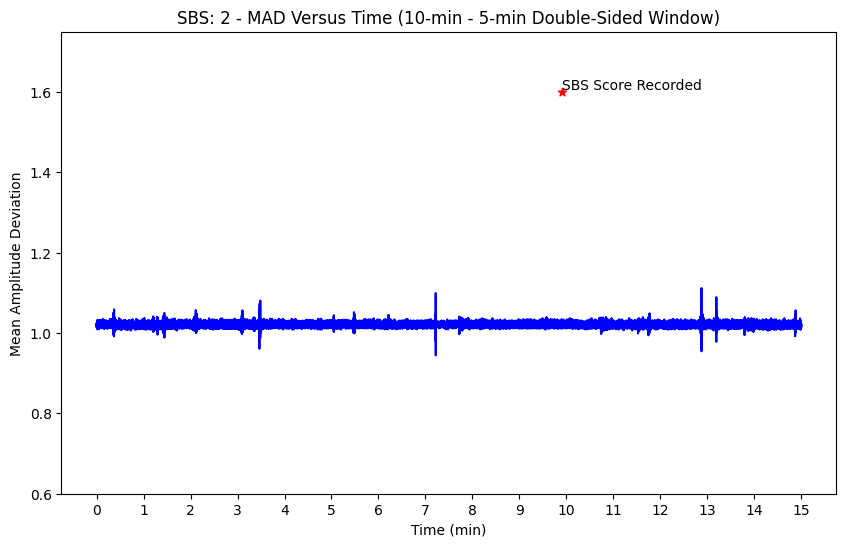

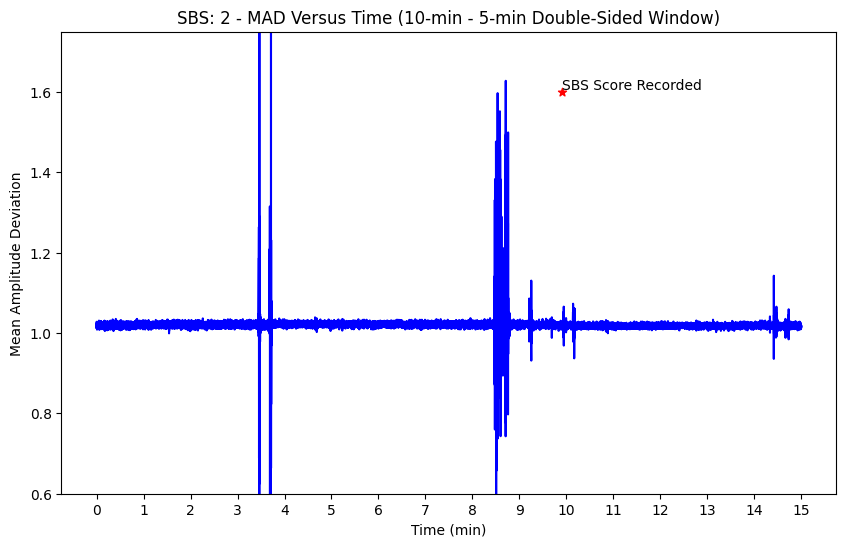

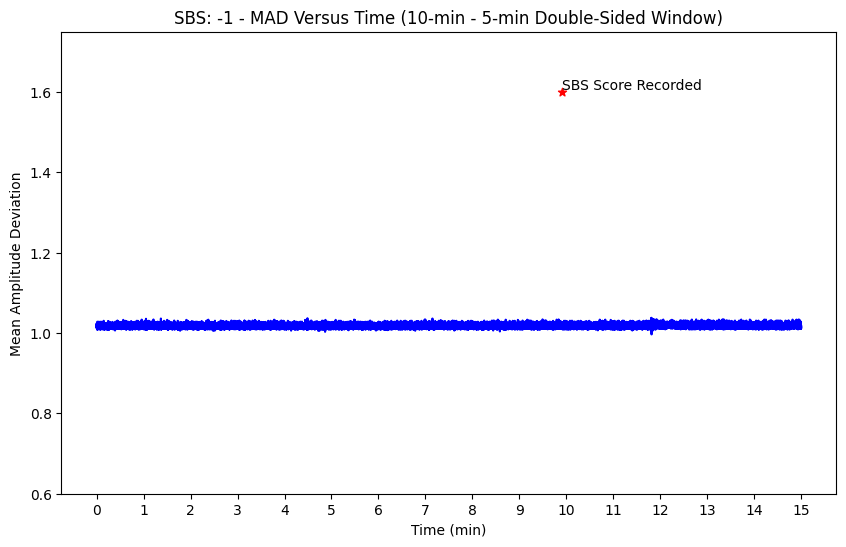

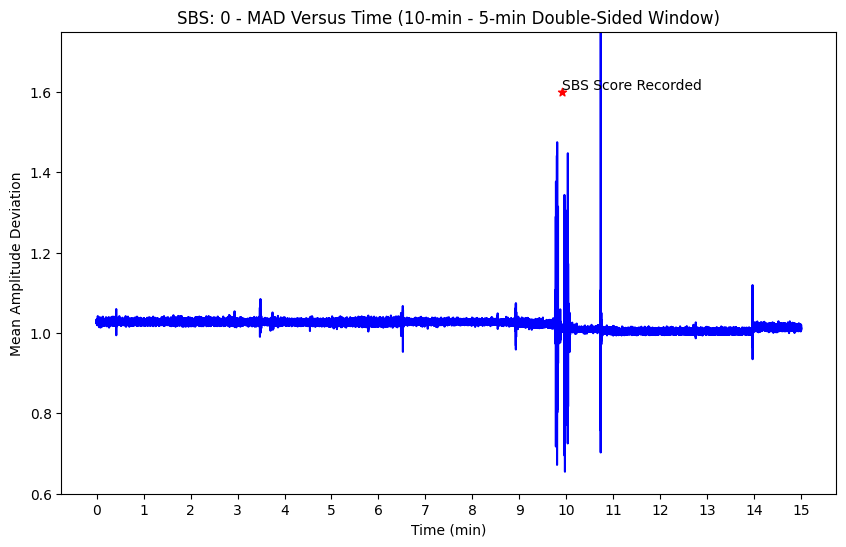

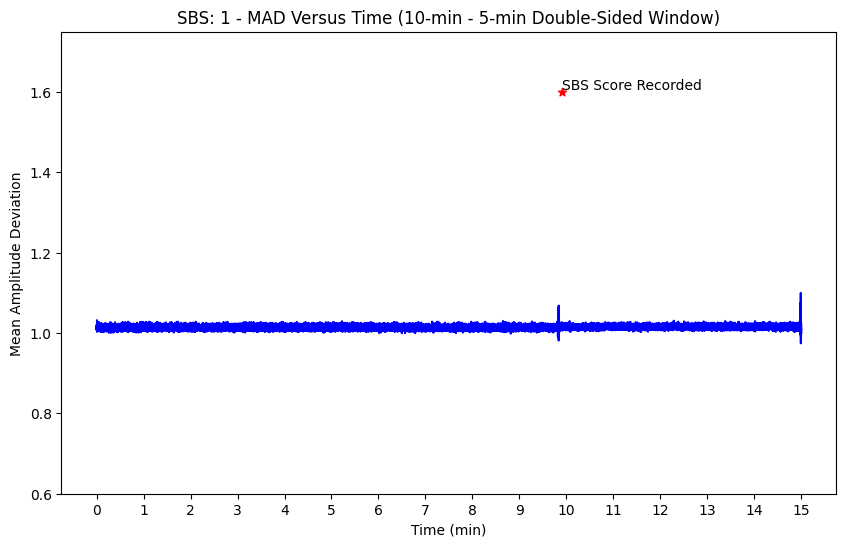

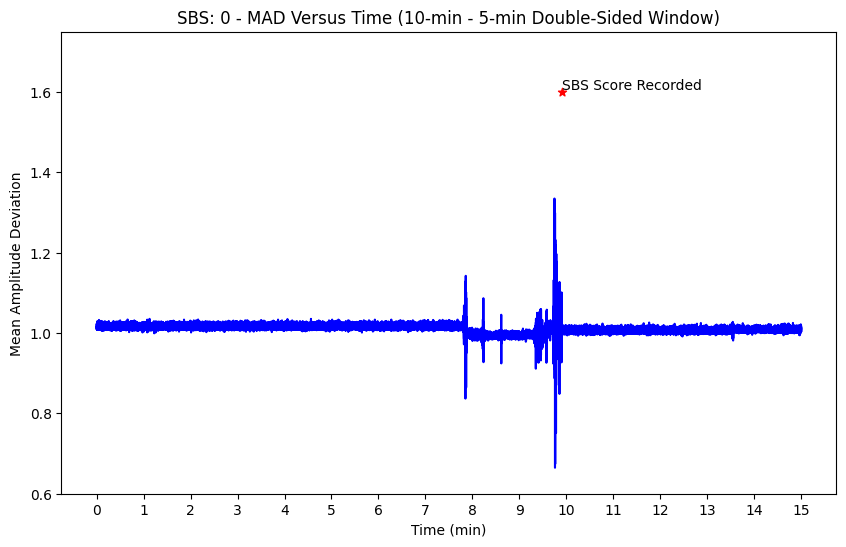

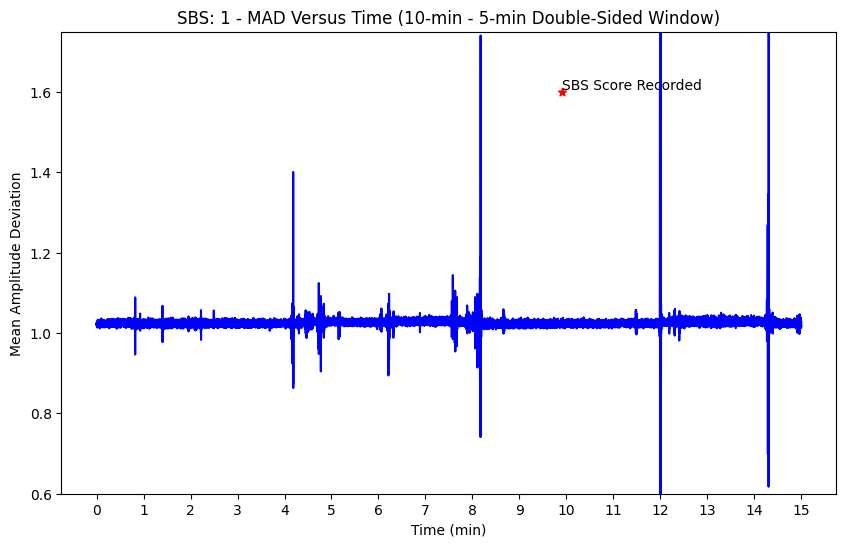

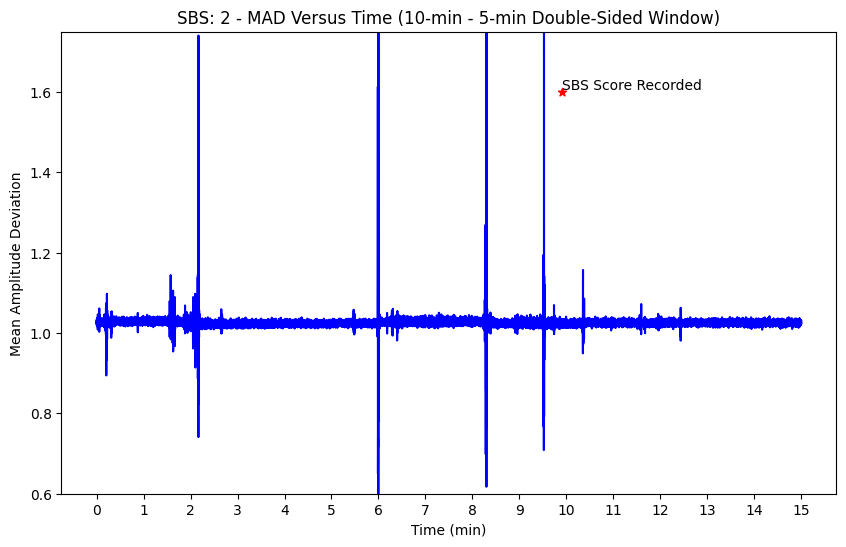

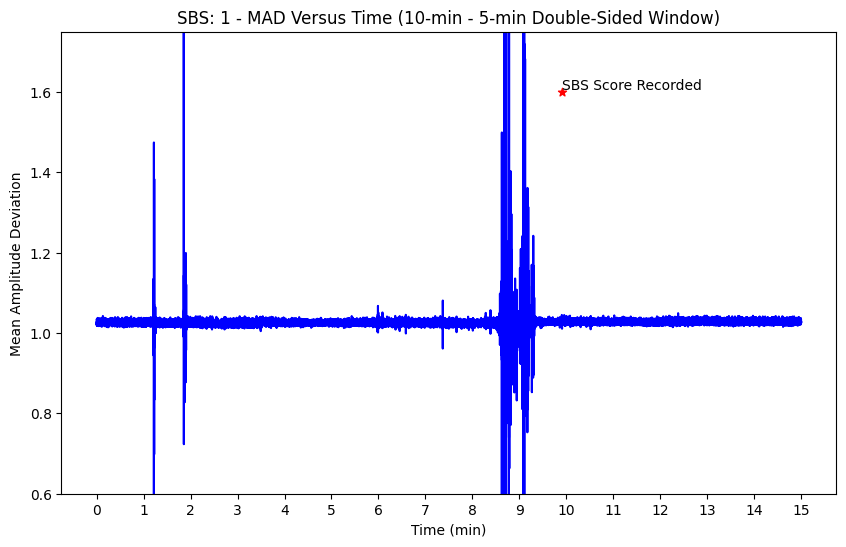

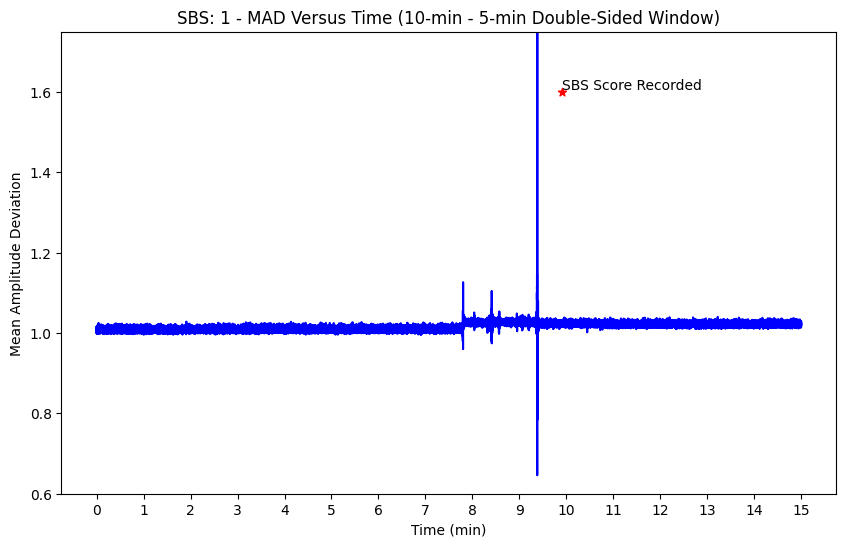

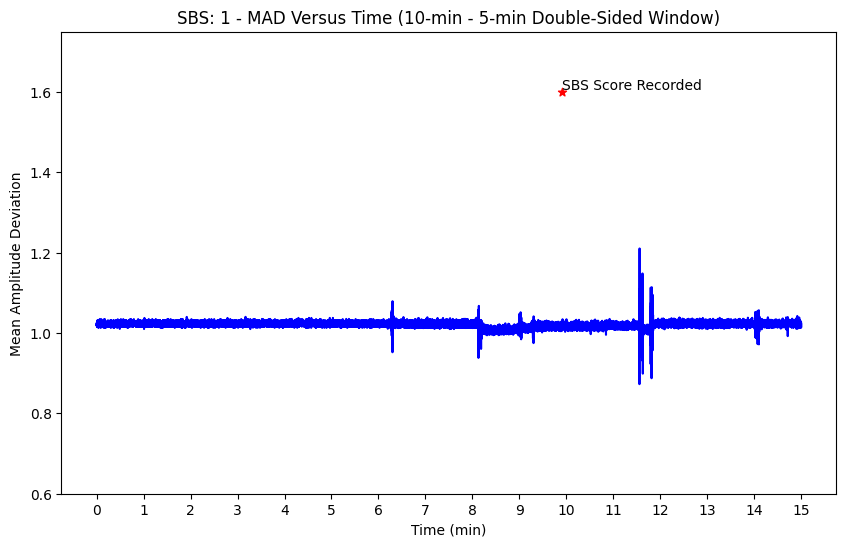

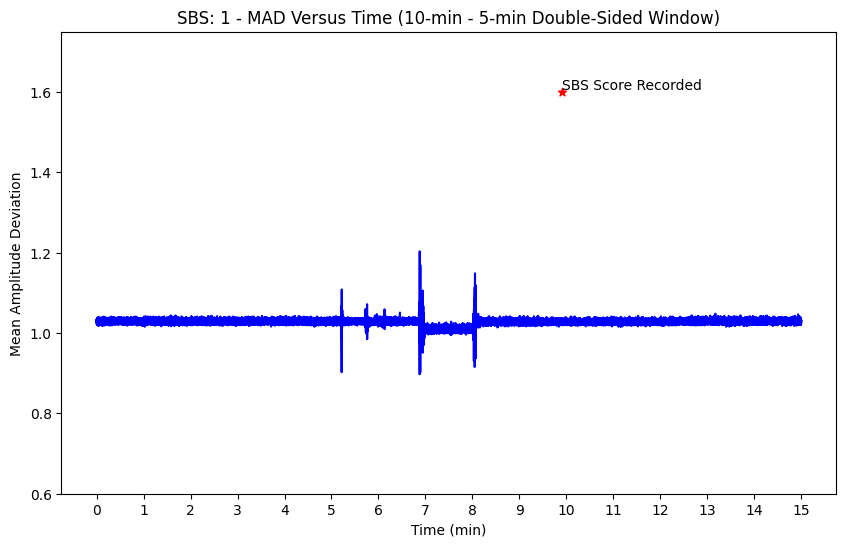

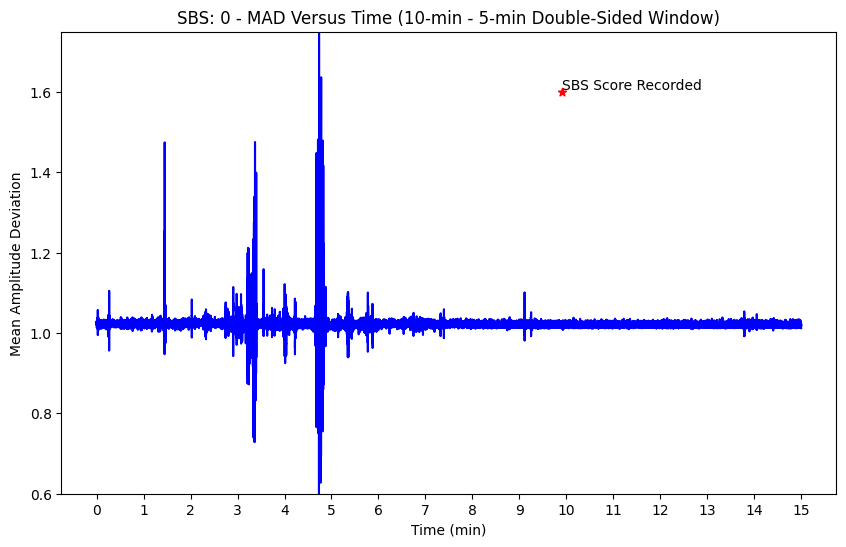

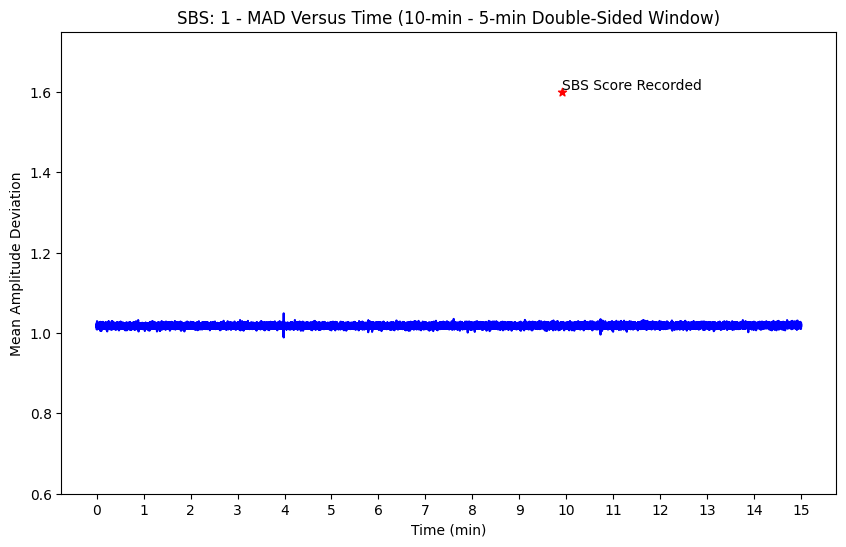

In [184]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 89899, num=89899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 89899, num=16), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                                               '12', '13', '14', '15'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')
    
    tick_position = 99 * 8989.9 / 15
    plt.scatter(tick_position, 1.6, color='red', marker='*')
    plt.text(tick_position, 1.6, "SBS Score Recorded", fontsize=10, verticalalignment='bottom')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (10-min - 5-min Double-Sided Window)')
    
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\AnalysisResults\Patient9_10MIN_5MIN_DSW'
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    
    # Display the plot
    plt.show()
    
    count += 1

15 Min - 5 Minute Double-Sided Window

In [185]:
# Load 10-Min, 5-MIN Double-Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')
filename = 'Patient9_15MIN_5MIN_DSW_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
119899


In [186]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

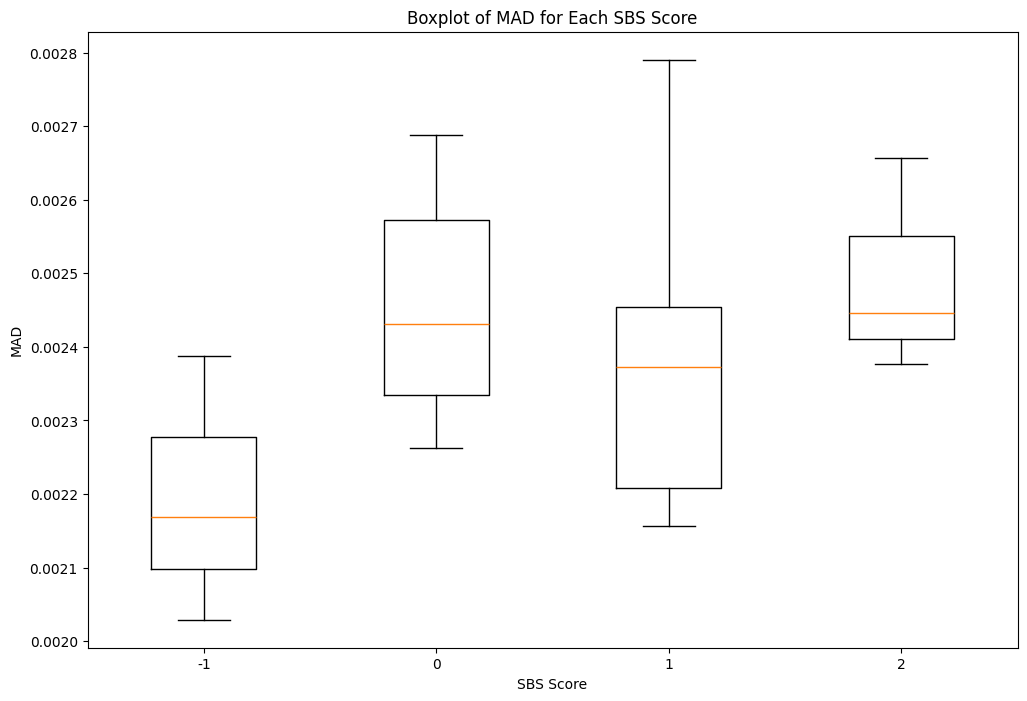

SBS Score: -1
Q1: 0.0020987022003804722
Q2 (Median): 0.0021681954855924768
Q3: 0.0022778168054610913
90th Percentile: 0.0023435895973822605

SBS Score: 0
Q1: 0.002334105756237577
Q2 (Median): 0.0024309828039607902
Q3: 0.0025726546577156313
90th Percentile: 0.0026394505658309956

SBS Score: 1
Q1: 0.002208585734447614
Q2 (Median): 0.002373199363052888
Q3: 0.002454519039168976
90th Percentile: 0.0025955873686843082

SBS Score: 2
Q1: 0.0024112022330886876
Q2 (Median): 0.0024463206847931663
Q3: 0.0025512554844620604
90th Percentile: 0.002614216364263397



In [187]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

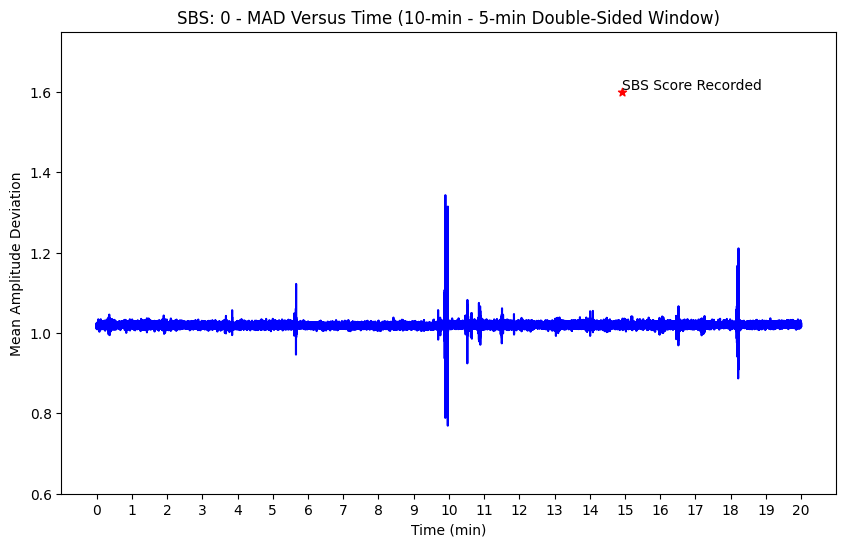

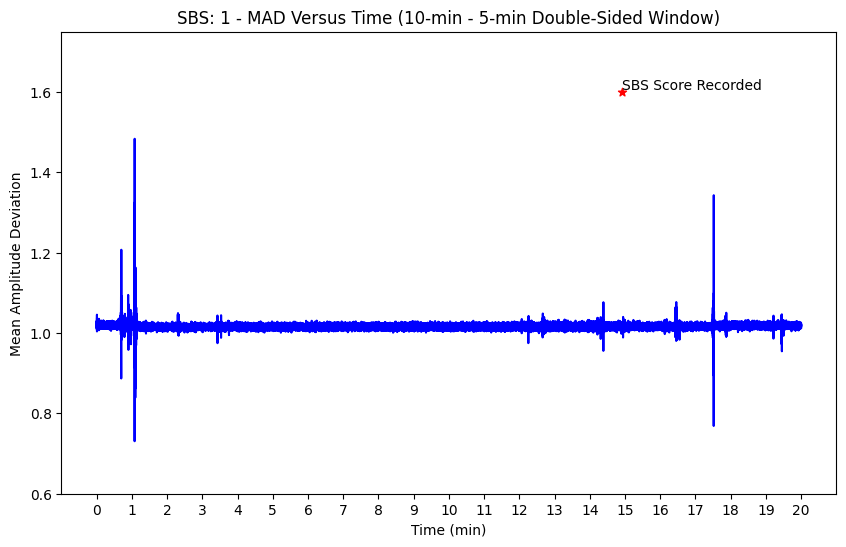

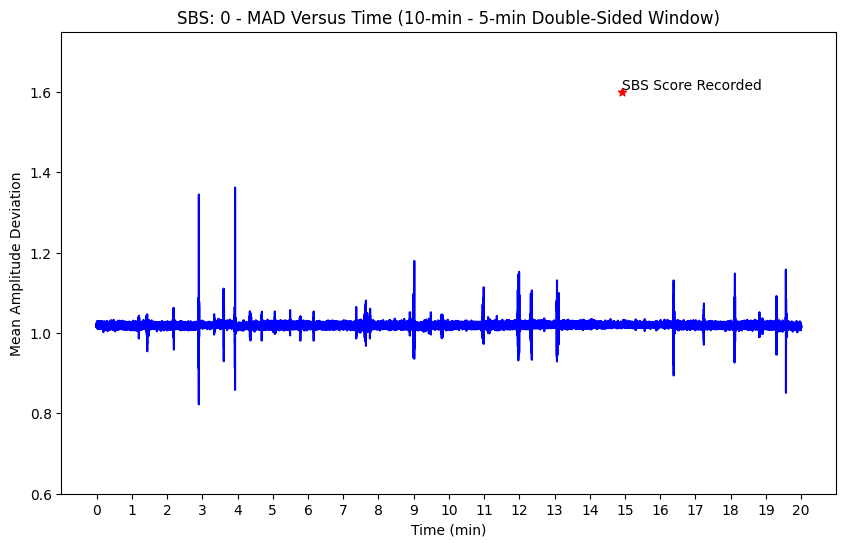

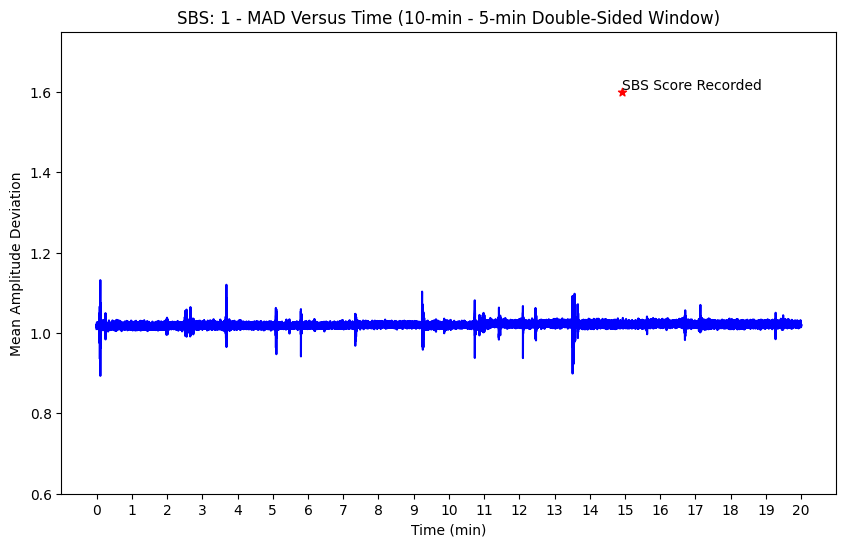

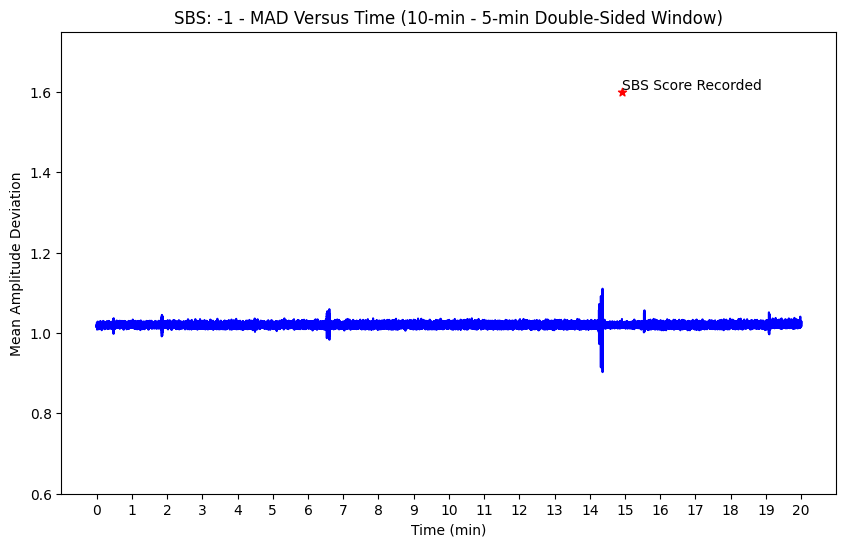

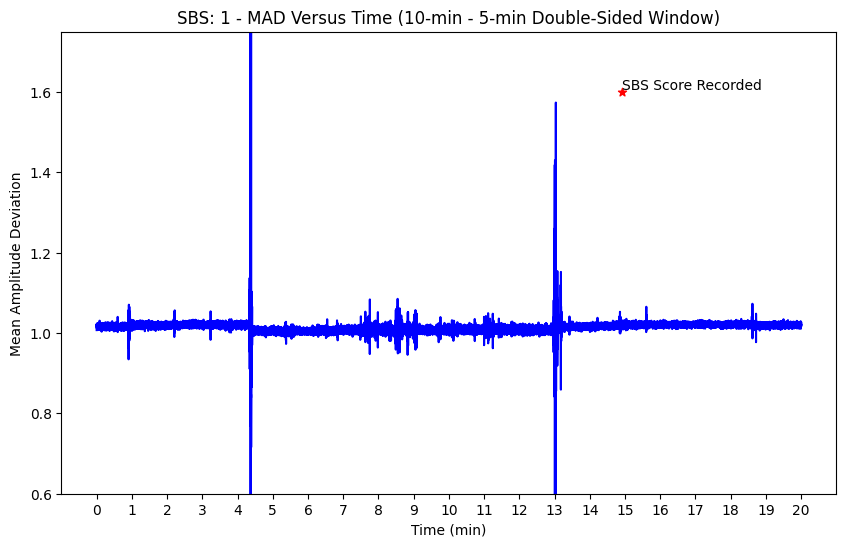

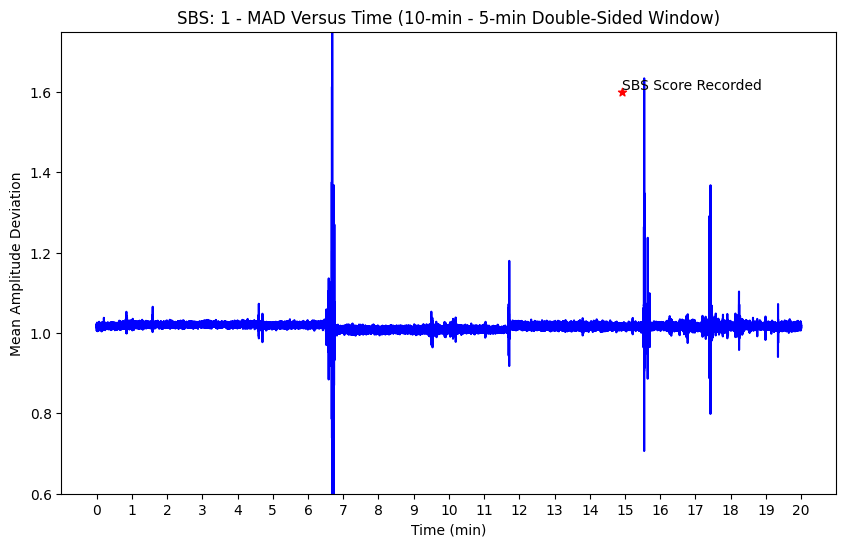

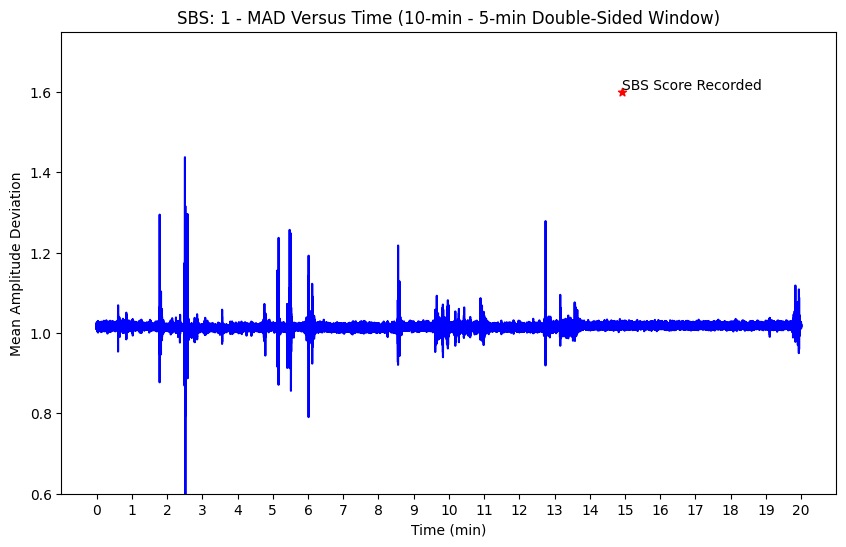

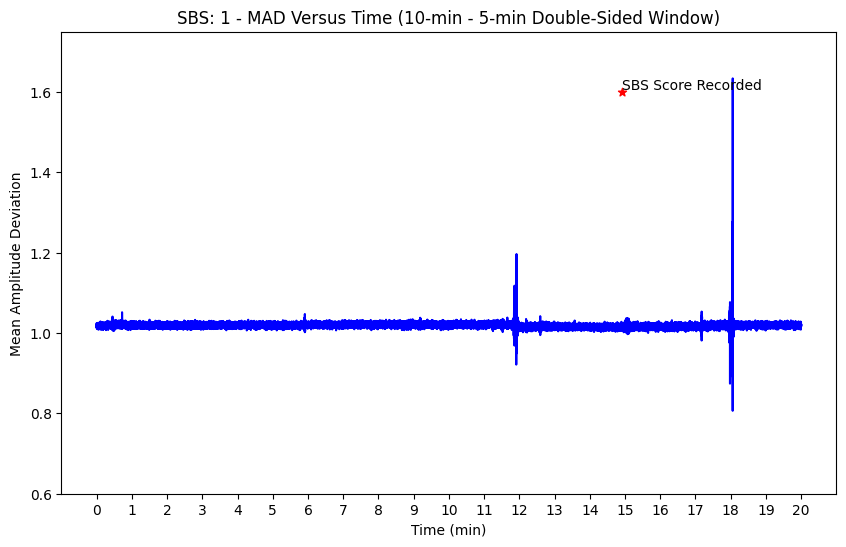

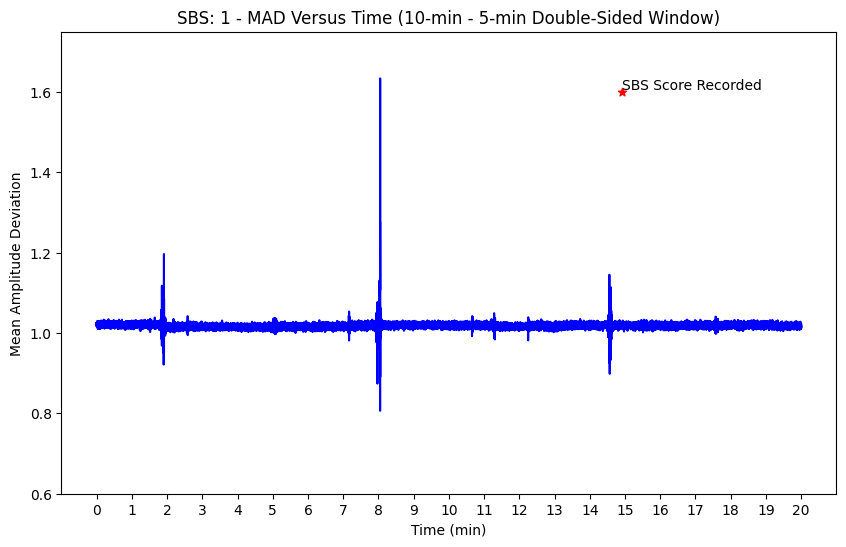

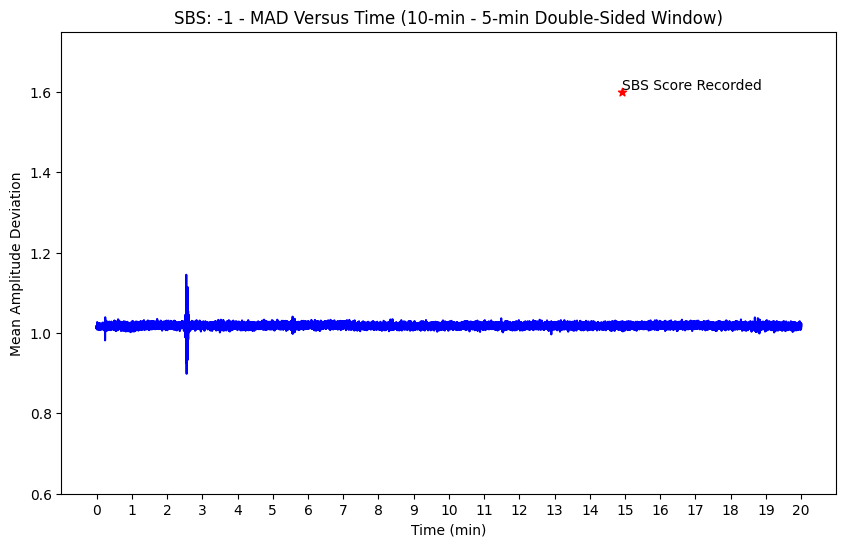

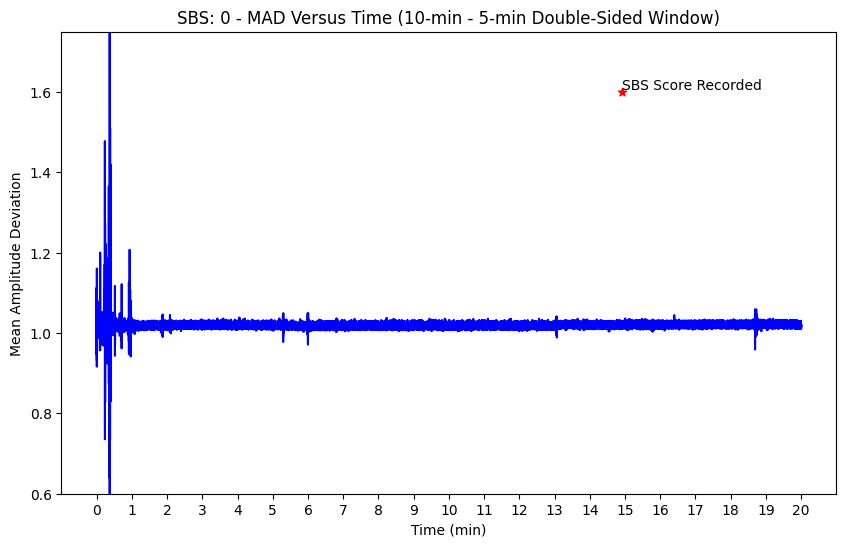

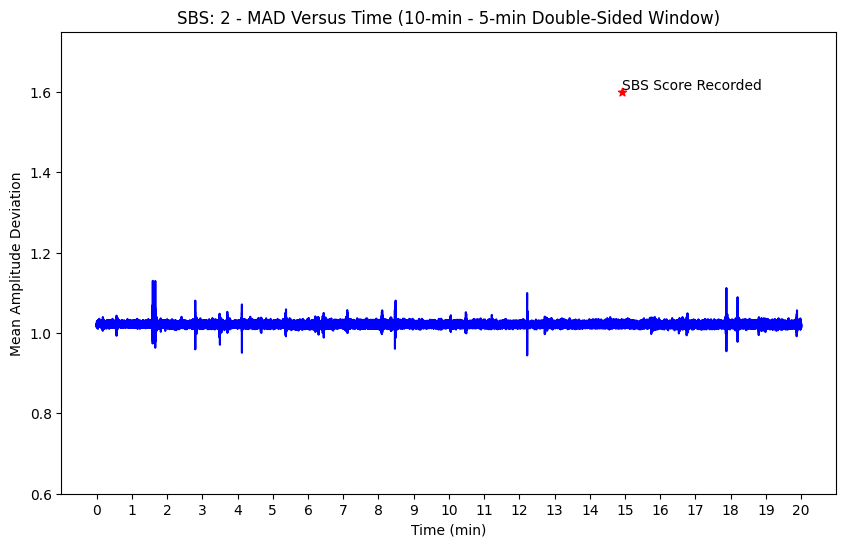

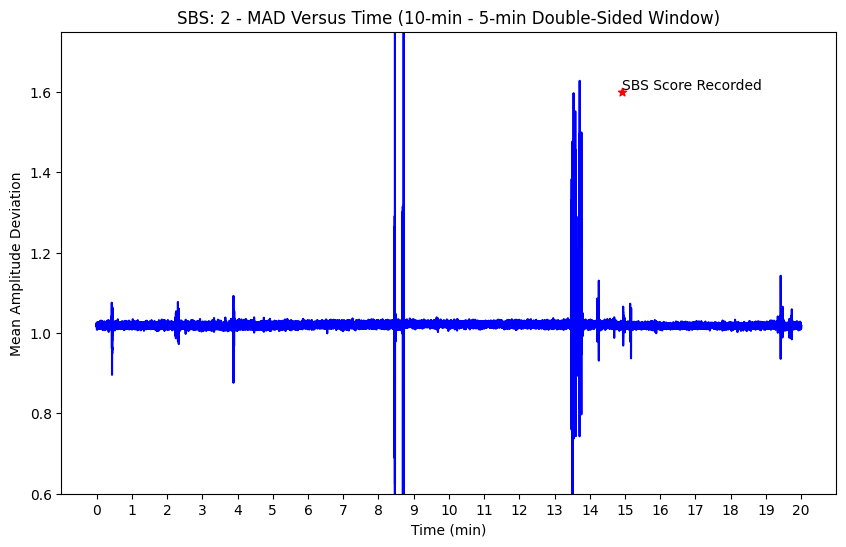

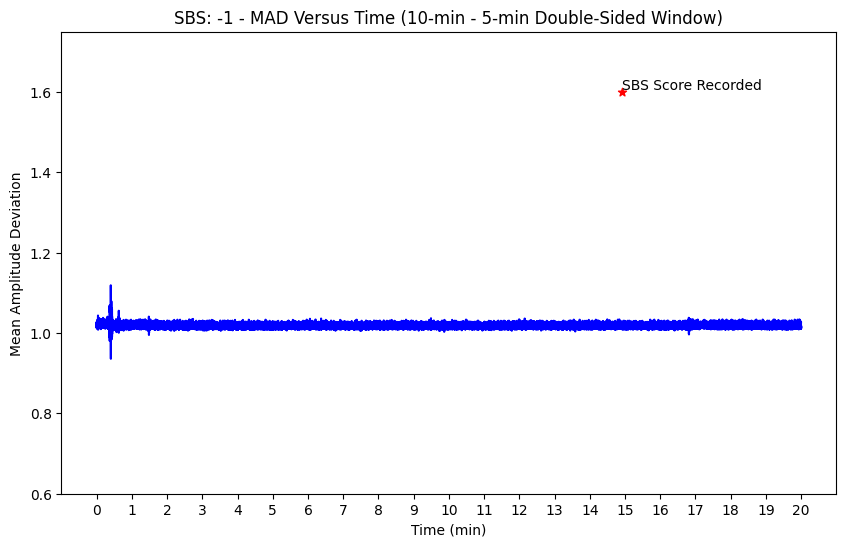

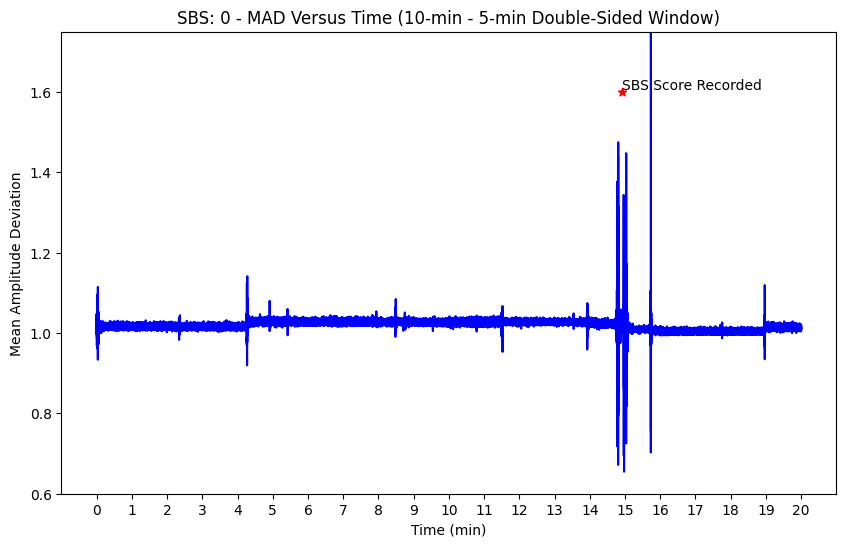

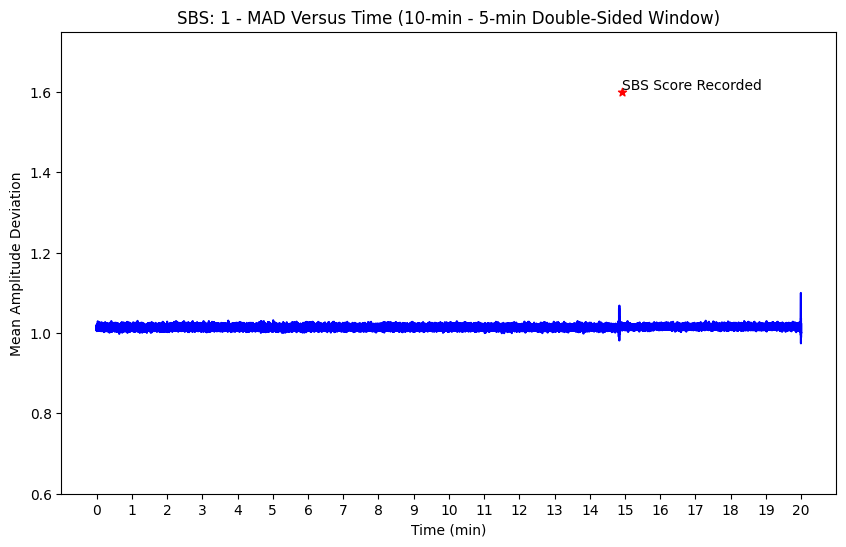

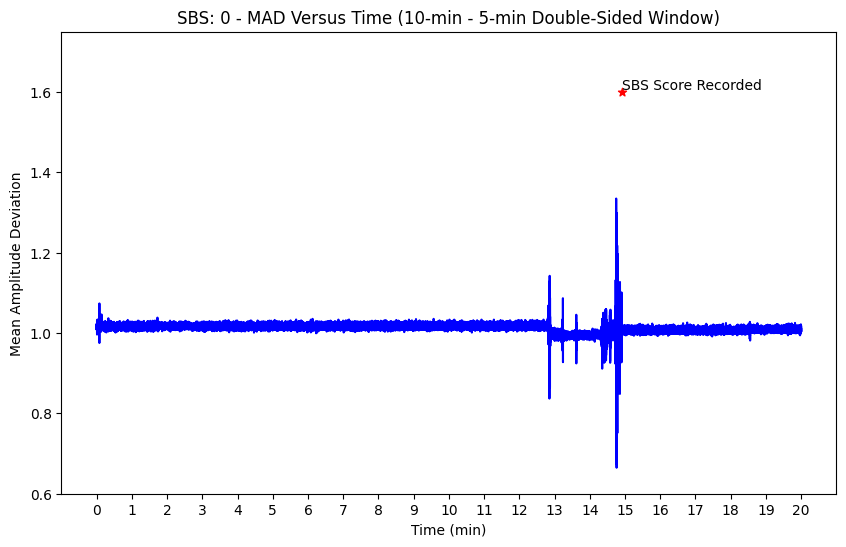

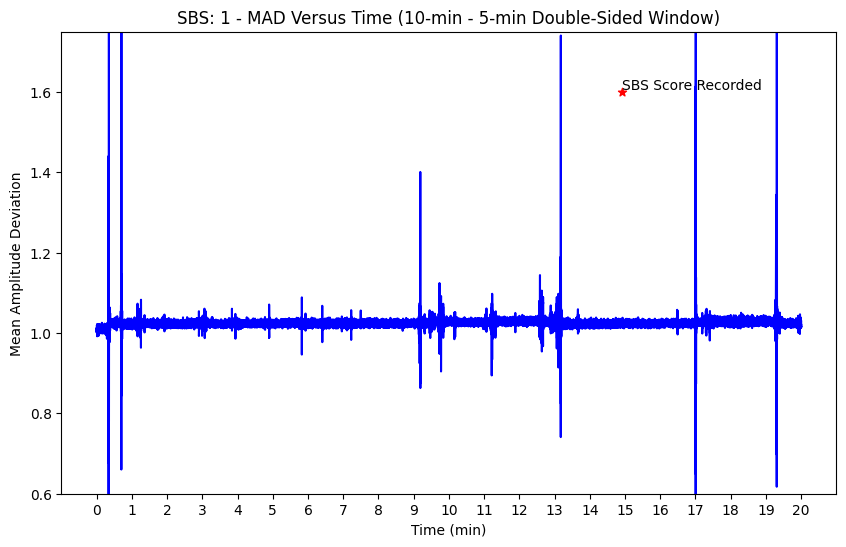

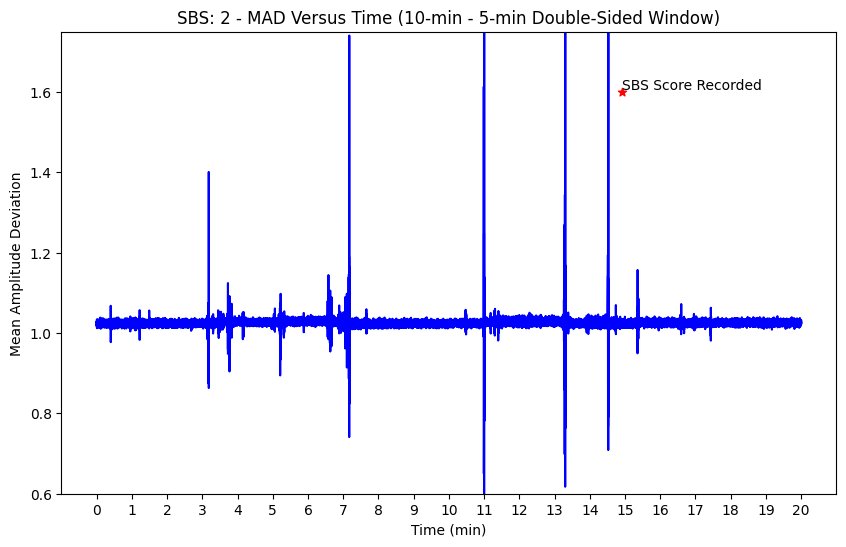

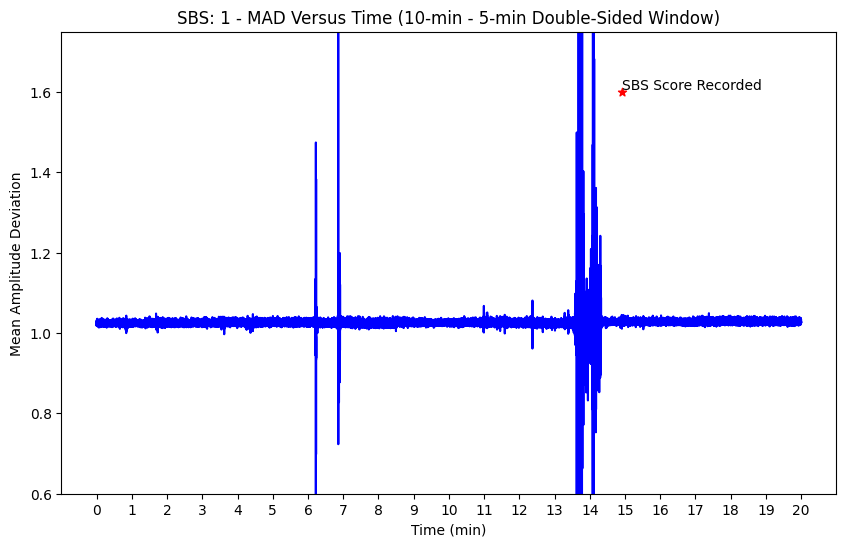

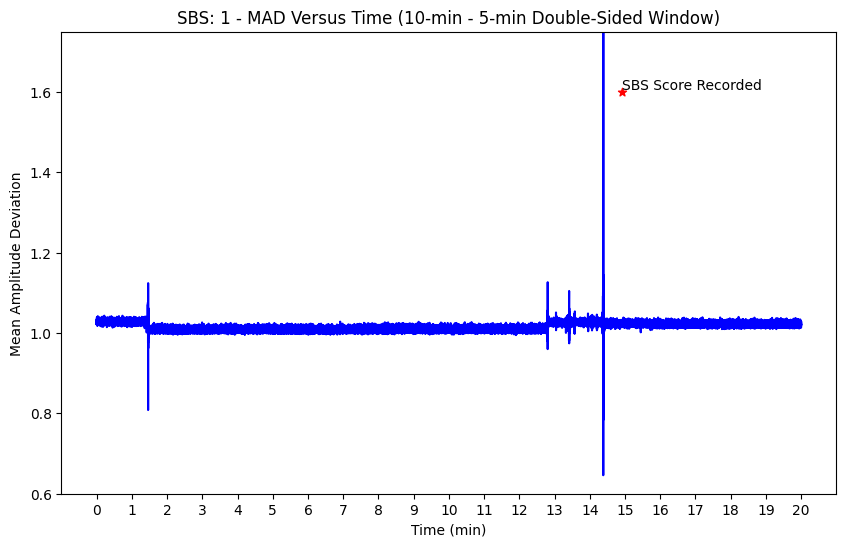

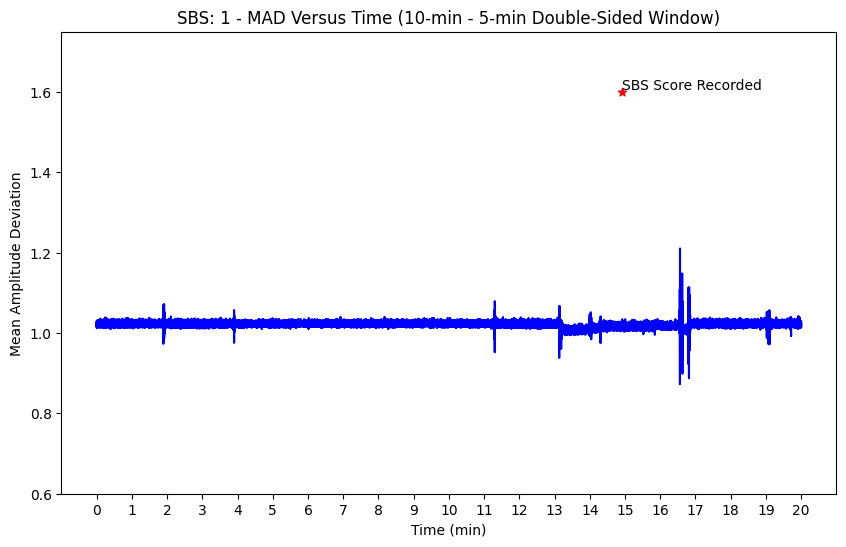

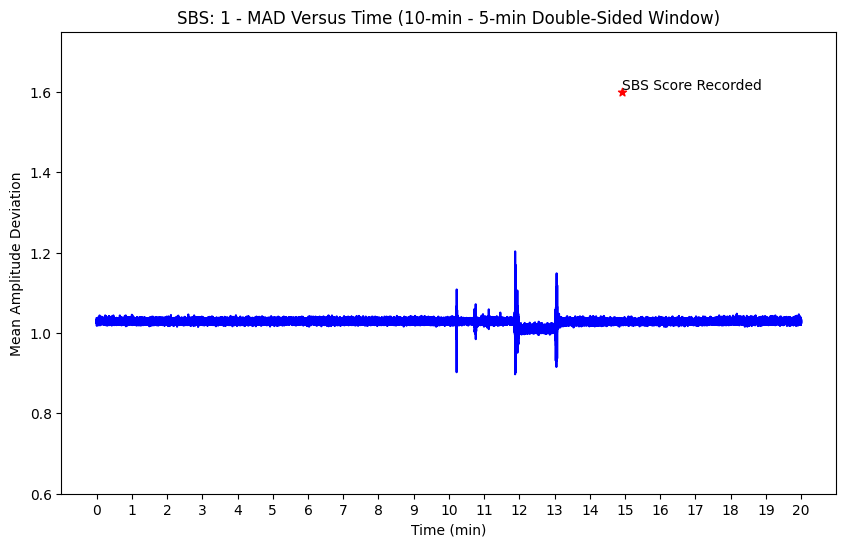

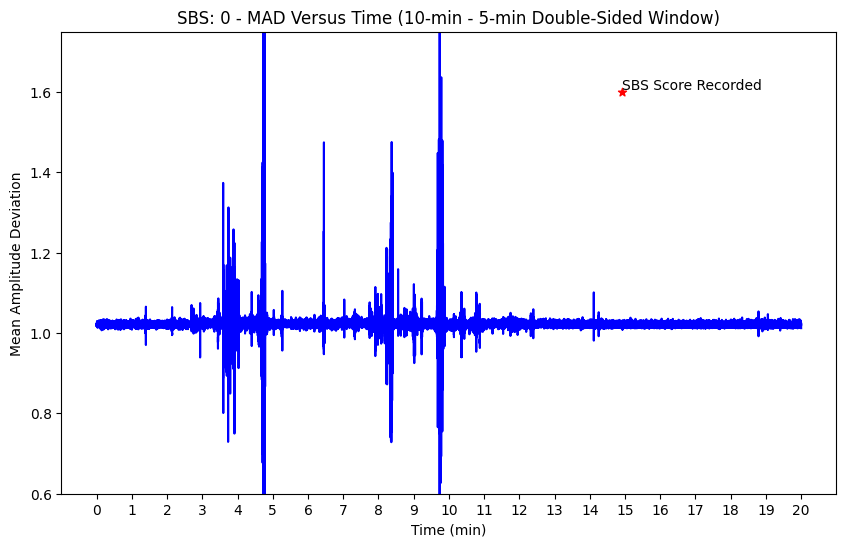

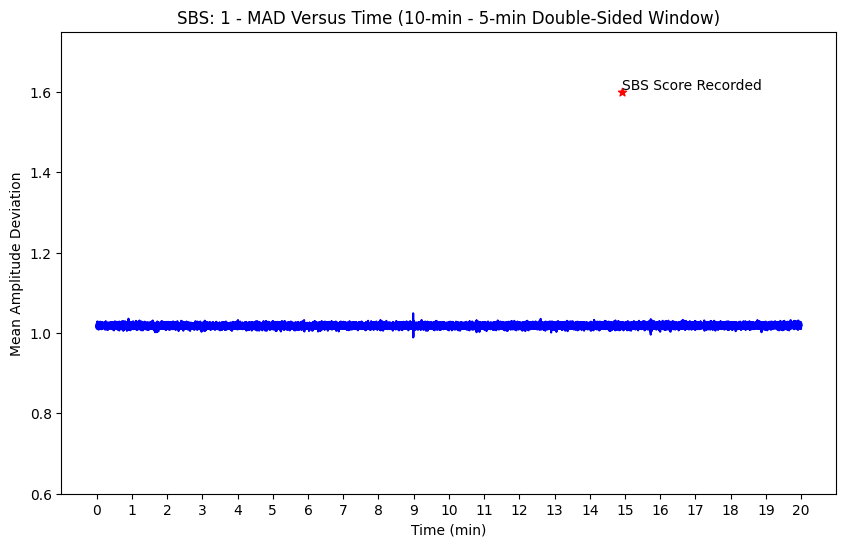

In [188]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 119899, num=119899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 119899, num=21), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                                               '12', '13', '14', '15', '16', '17', '18', '19', '20'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')
    
    tick_position = 149 * 11989.9 / 20
    plt.scatter(tick_position, 1.6, color='red', marker='*')
    plt.text(tick_position, 1.6, "SBS Score Recorded", fontsize=10, verticalalignment='bottom')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (10-min - 5-min Double-Sided Window)')
    
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\AnalysisResults\Patient9_15MIN_5MIN_DSW'
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    
    # Display the plot
    plt.show()
    
    count += 1